The problem with most datasets is that they are imbalanced. There is a class imbalance, i.e. % of samples of class 0 > % of samples of class 1. SMOTE stands for  **Synthetic Minority Oversampling Technique** and helps in situations like these

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [16]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

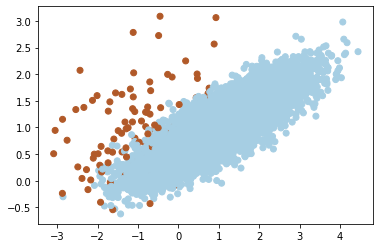

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

In [9]:
Counter(y)

Counter({0: 9900, 1: 100})

How SMOTE works if upsampling the minority class:

- Select a minority datapoint at random
- Get its K nearest neighbors(k=5 by default, we can change this)
- Select a nearest neighbor randomly
- Generate a new datapoint between the minority datapoint selected and the randomly nearest neighbor selected

SMOTE has an parameter `sampling_strategy` which tells the ratio of minority to majority class after the resampling. The following example explains it well

In [47]:
Counter(SMOTE(sampling_strategy=0.9).fit_resample(X, y)[1])

Counter({0: 9900, 1: 8910})

Since we passed `sampling_strategy = 0.9`, after resampling, the result of Count(minority)/Count(majority) will be 0.9, as shown:

In [48]:
8910/9900

0.9

By default, the `sampling_strategy` is set to a string `auto` which states that the ratio should be 1, i.e. equal cases of both classes

In [22]:
oversample = SMOTE(k_neighbors=5)
X_test, y_test = oversample.fit_resample(X, y)

In [23]:
Counter(y_test)

Counter({0: 9900, 1: 9900})

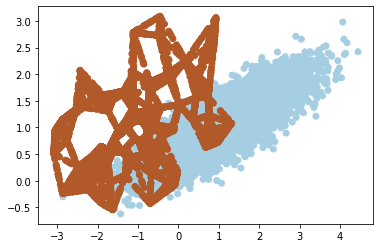

In [26]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)

SMOTE paper suggested this:

In [20]:
over = SMOTE(sampling_strategy=0.1)
Counter(over.fit_resample(X, y)[1])

Counter({0: 9900, 1: 990})

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
under = RandomUnderSampler(sampling_strategy=0.5)
Counter(under.fit_resample(X, y)[1])

Counter({0: 200, 1: 100})

In [39]:
from imblearn.pipeline import Pipeline

In [43]:
steps = [('over_sampler', over), ('under_sample', under)]
pipeline = Pipeline(steps)

In [44]:
Counter(pipeline.fit_resample(X, y)[1])

Counter({0: 1980, 1: 990})

## Borderline SMOTE

Borderline SMOTE is the same as SMOTE but with a difference: it only selects one of the nearest neighbors that has a high chance of getting misclassified, i.e. neighbors who are very close to the decision boundary

In [50]:
from imblearn.over_sampling import BorderlineSMOTE

In [52]:
X_borderline, y_borderline = BorderlineSMOTE().fit_resample(X, y)

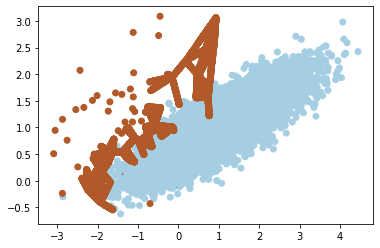

In [54]:
plt.scatter(X_borderline[:, 0], X_borderline[:, 1], c=y_borderline, cmap=plt.cm.Paired)

## Adaptive Synthetic Sampling (ADASYN)

Same as SMOTE, but generates more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high

In [55]:
from imblearn.over_sampling import ADASYN

In [58]:
X_adaptive, y_adaptive = ADASYN().fit_resample(X, y)

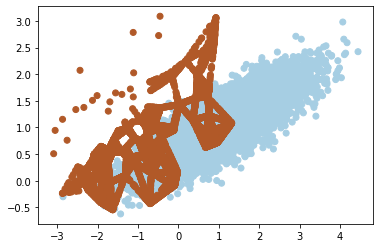

In [59]:
plt.scatter(X_adaptive[:, 0], X_adaptive[:, 1], c=y_adaptive, cmap=plt.cm.Paired)

# References

- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/